<a href="https://colab.research.google.com/github/MohankumarreddyDuggasani/CODERS-CAVE/blob/main/Exploratory_Data_Analysis_terrorism_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing and observing the data

The data string is of latin1 encoding instead of UTF-8 encoding

In [ ]:
data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


<ipython-input-59-1a7ce99941f8>:1: DtypeWarning: Columns (4,31,33,60,61,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/globalterrorismdb_0718dist.csv", encoding="latin1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25548 entries, 0 to 25547
Columns: 135 entries, eventid to related
dtypes: float64(59), int64(19), object(57)
memory usage: 26.3+ MB


In [ ]:
df.shape

(25548, 135)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

# Cleaning the data

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

<ipython-input-65-a989c62acfc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",


In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25548 entries, 0 to 25547
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            25548 non-null  int64  
 1   Month           25548 non-null  int64  
 2   Day             25548 non-null  int64  
 3   Country         25548 non-null  object 
 4   Region          25548 non-null  object 
 5   Province/State  25439 non-null  object 
 6   City            25548 non-null  object 
 7   Latitude        24283 non-null  float64
 8   Longitude       24283 non-null  float64
 9   Location        644 non-null    object 
 10  Summary         1033 non-null   object 
 11  Attack Type     25548 non-null  object 
 12  Target Type     25548 non-null  object 
 13  Group Name      25548 non-null  object 
 14  Motive          763 non-null    object 
 15  Weapon Type     25547 non-null  object 
 16  Killed          20572 non-null  float64
 17  Wounded         18899 non-null 

In [ ]:
df.shape

(25548, 19)

In [ ]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State      109
City                  0
Latitude           1265
Longitude          1265
Location          24904
Summary           24515
Attack Type           0
Target Type           0
Group Name            0
Motive            24785
Weapon Type           1
Killed             4976
Wounded            6649
Add Notes         24783
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,25548.000000,25548.000000,25548.000000,24283.000000,2.428300e+04,25548.000000,25548.000000,25548.000000
mean,1979.941170,6.222992,15.122945,21.915312,-3.582293e+03,1.763073,1.179153,2.942226
std,3.800319,3.394062,8.905801,24.763311,5.530761e+05,8.777355,10.081919,14.524127
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1978.000000,3.000000,7.000000,10.981412,-8.582686e+01,0.000000,0.000000,0.000000
50%,1981.000000,6.000000,15.000000,23.727107,-5.852847e+01,0.000000,0.000000,0.000000
75%,1983.000000,9.000000,23.000000,41.890961,8.742907e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,751.000000,760.000000


# Observation

### 1. The data consists of terrorist activities ranging from the year: 1970 to 2017
### 2. Maximum number of people killed in an event were: 1570
### 3. Maximum number of people wounded in an event were: 8191
### 4. Maximum number of total casualties in an event were: 9574New Section

#Visualizing the data

##1. Year wise Attacks

###### 1 .Number of Attacks in each Year

In [ ]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


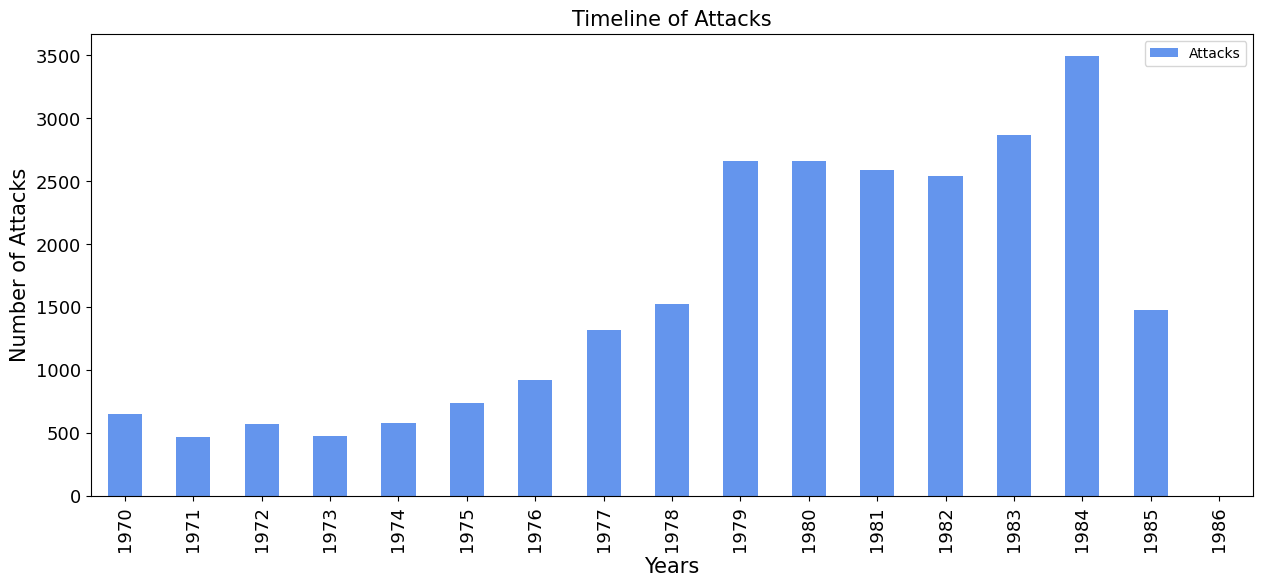

In [ ]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()


####(i). Most number of attacks(16903) in 2014
####(ii). Least number of attacks(471) in 1971


2.Total Casualties (Killed + Wounded) in each Year

In [ ]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


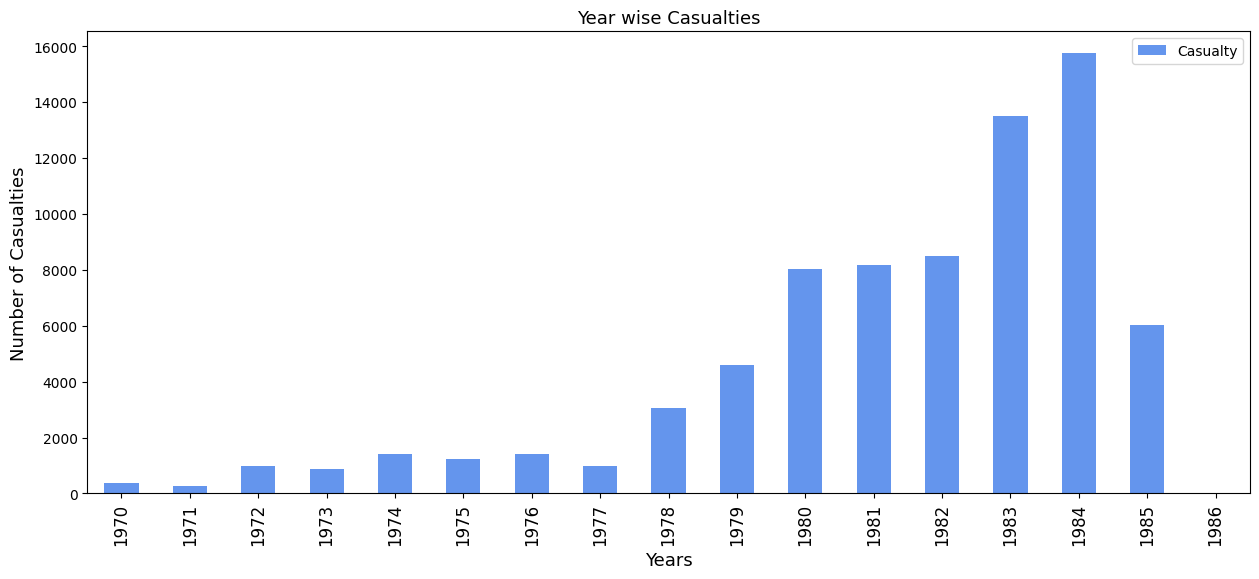

In [ ]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Year

In [ ]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [ ]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


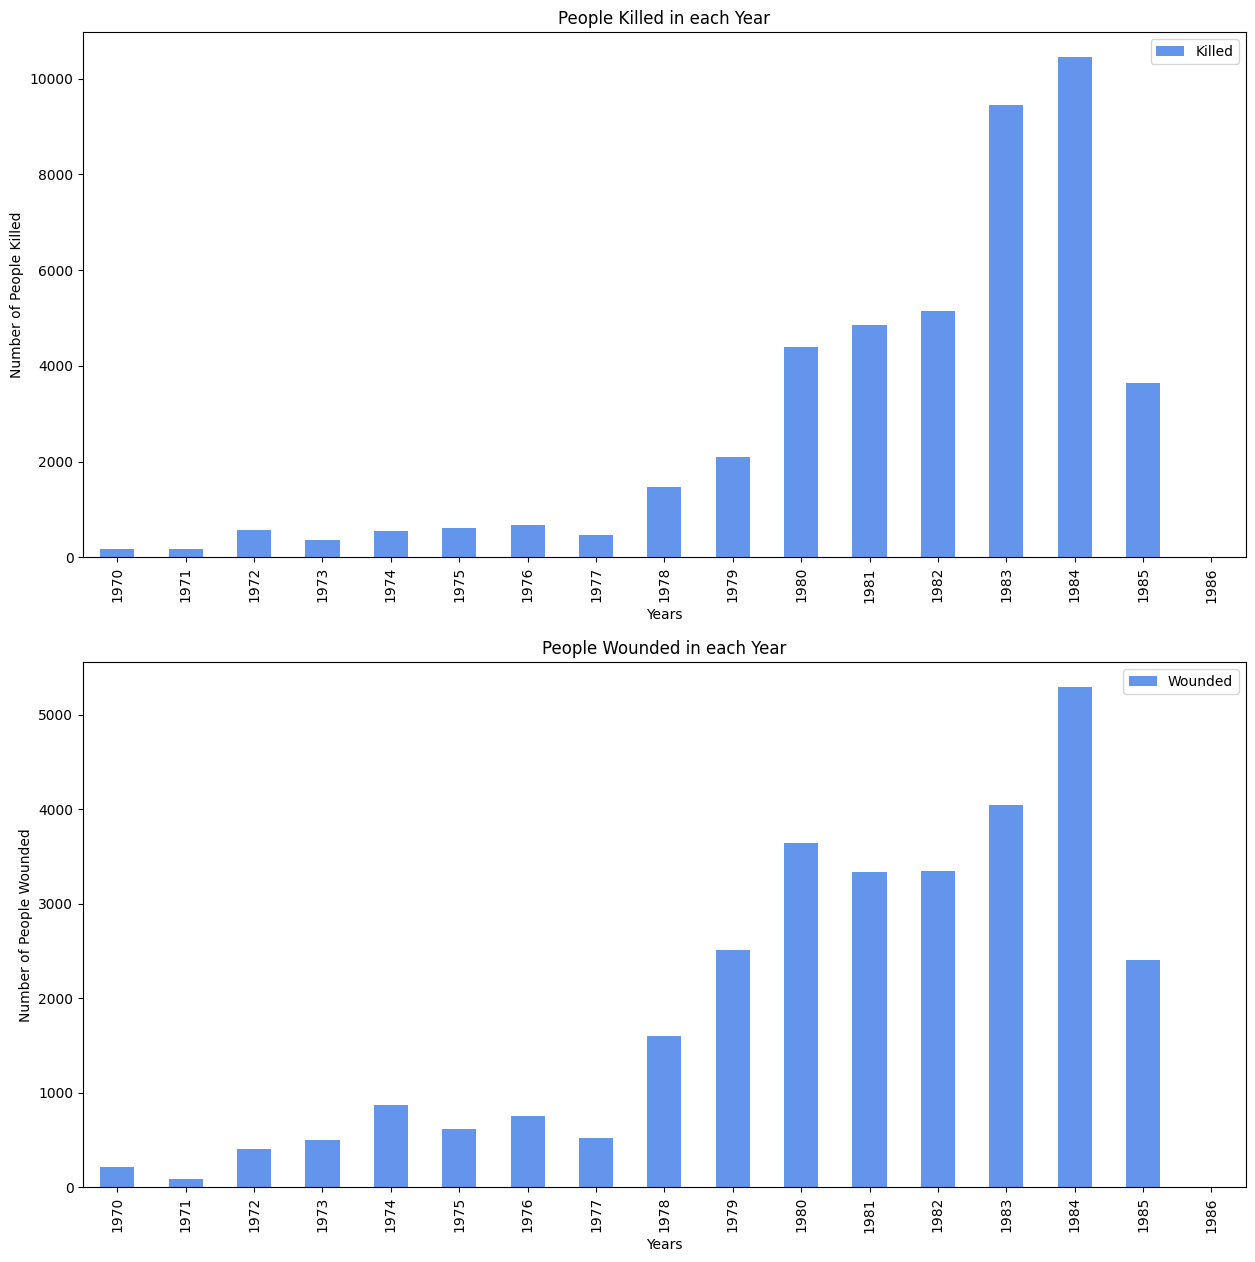

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

# 2.Region wise Attacks


1.Distribution of Terrorist Attacks over Regions from 1970-2017

In [ ]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


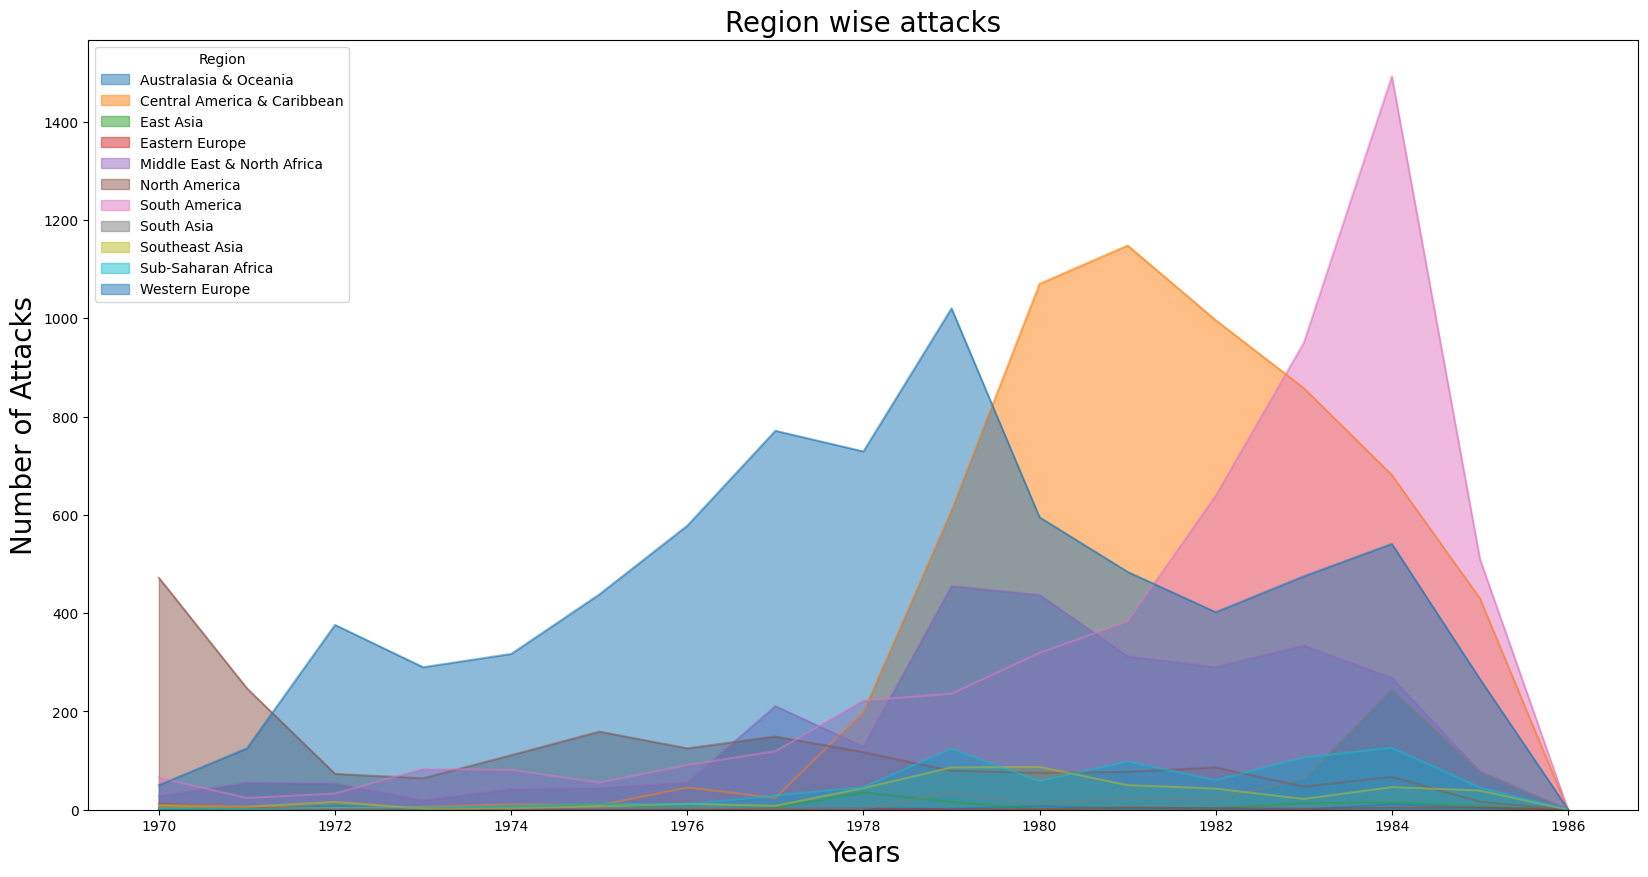

In [ ]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2.Total Terrorist Attacks in each Region from 1970-2017

In [ ]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 7458
Central America & Caribbean    6101
South America                  5302
Middle East & North Africa     2809
North America                  1964
Sub-Saharan Africa              735
South Asia                      490
Southeast Asia                  481
East Asia                       121
Eastern Europe                   44
Australasia & Oceania            43
Name: Total, dtype: int64

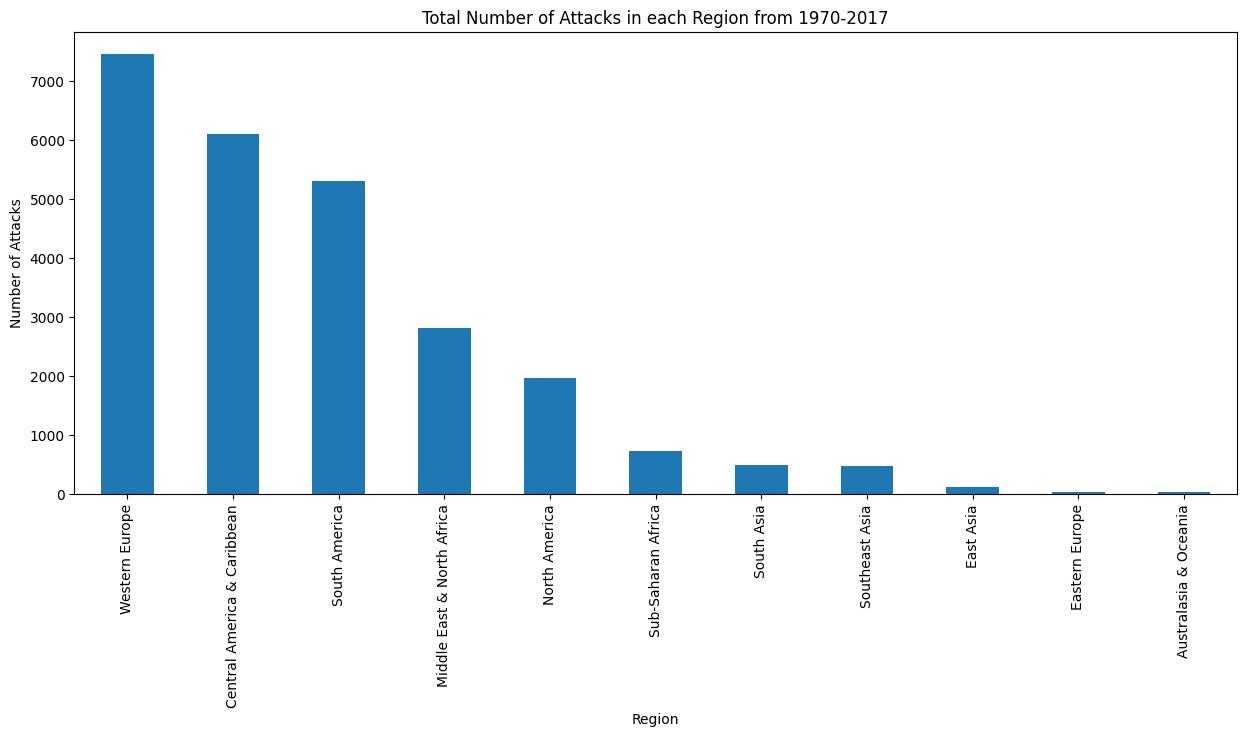

In [ ]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3.Total Casualties (Killed + Wounded) in each Region

In [ ]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Central America & Caribbean,26412.0
Middle East & North Africa,13986.0
South America,10383.0
Western Europe,10166.0
Sub-Saharan Africa,4491.0
Southeast Asia,4293.0
South Asia,2926.0
North America,2221.0
East Asia,161.0


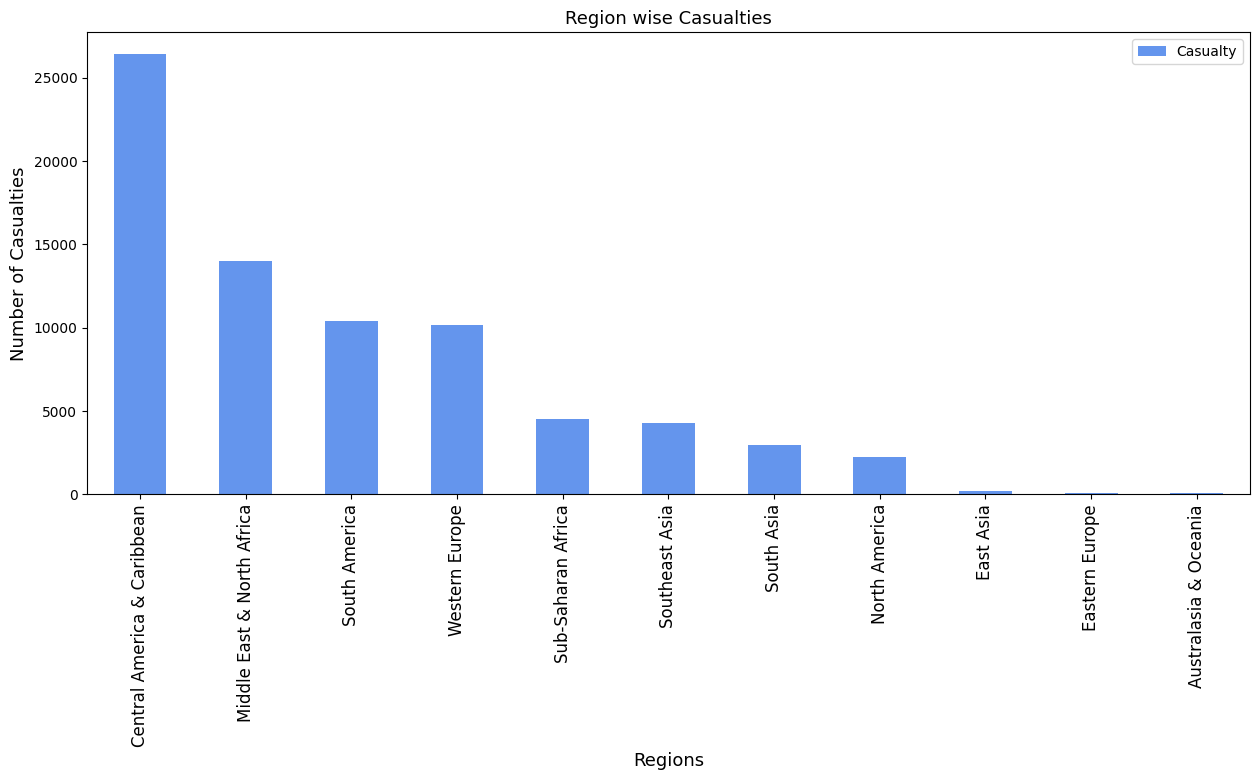

In [ ]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


4.Killed in each Region

In [ ]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Central America & Caribbean,22403.0
South America,7988.0
Middle East & North Africa,4436.0
Western Europe,3842.0
Sub-Saharan Africa,2326.0
Southeast Asia,1836.0
South Asia,1446.0
North America,663.0
East Asia,43.0


5.Wounded in each Region

In [ ]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,9550.0
Western Europe,6324.0
Central America & Caribbean,4009.0
Southeast Asia,2457.0
South America,2395.0
Sub-Saharan Africa,2165.0
North America,1558.0
South Asia,1480.0
East Asia,118.0


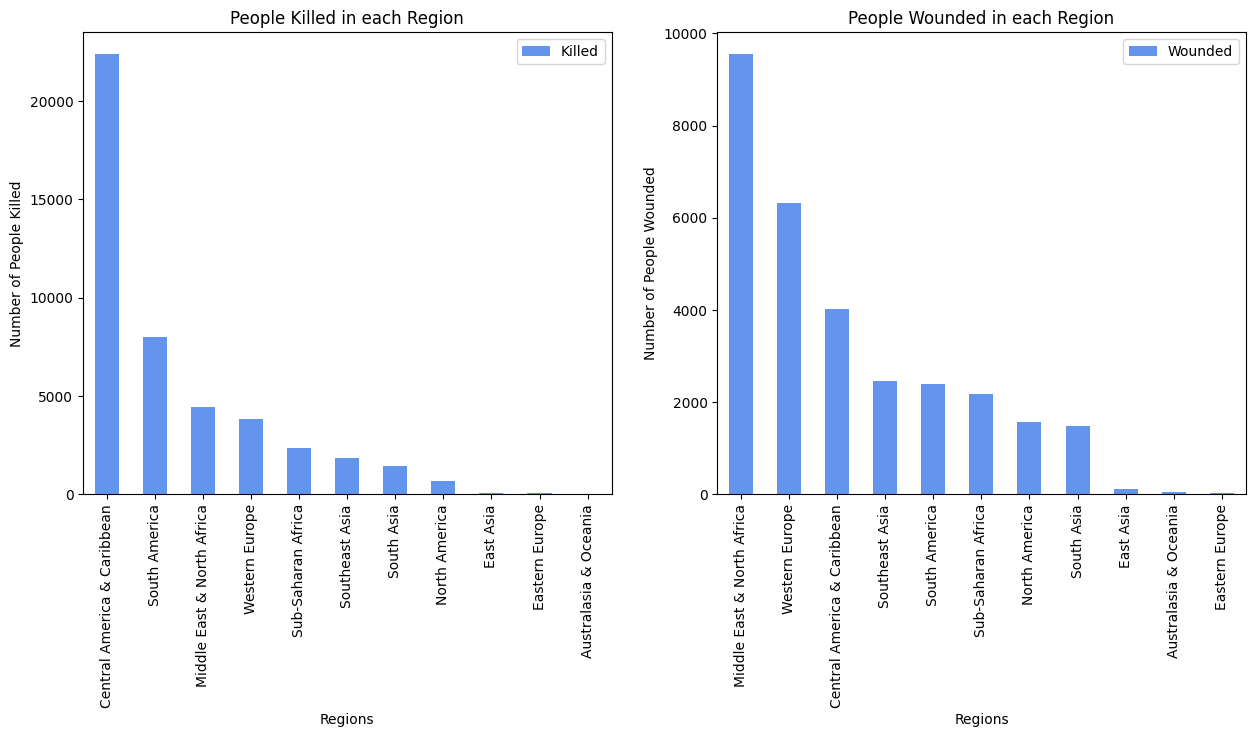

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#3.Country wise Attacks - Top 10

1.Number of Attacks in each Country

In [ ]:
ct=df["Country"].value_counts().head(10)
ct

El Salvador       3281
United Kingdom    2375
Peru              1900
United States     1814
Spain             1675
Colombia          1623
Guatemala         1376
Italy             1249
Nicaragua         1139
France            1030
Name: Country, dtype: int64

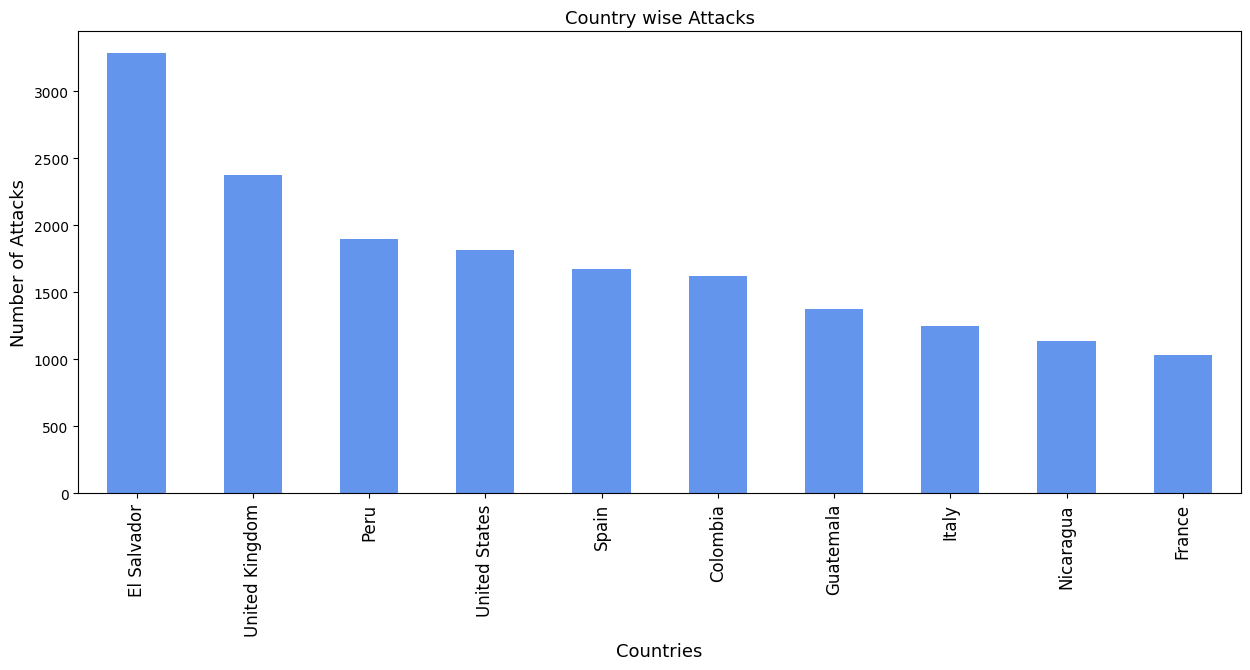

In [ ]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


2.Total Casualties (Killed + Wounded) in each Country

In [ ]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
El Salvador,11340.0
Nicaragua,9380.0
Peru,5959.0
Lebanon,5764.0
Guatemala,5240.0
United Kingdom,4353.0
Iran,3353.0
Colombia,3243.0
Philippines,3094.0


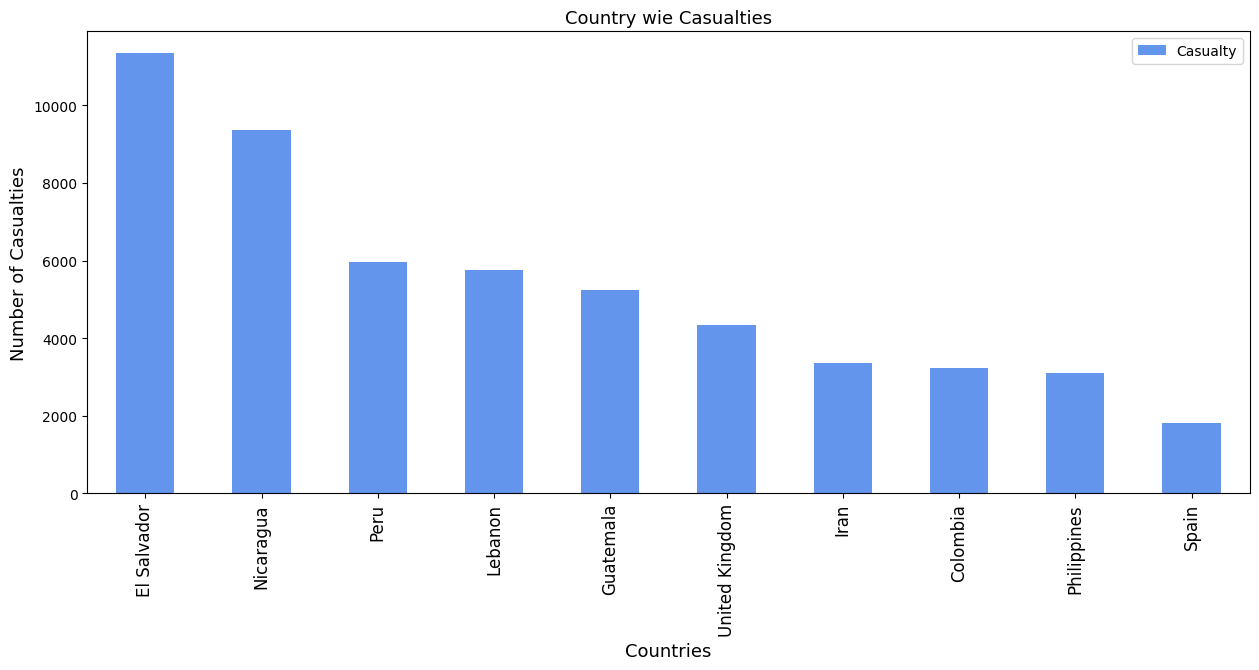

In [ ]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


3.Killed in each Country

In [ ]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
El Salvador,9299.0
Nicaragua,8450.0
Peru,5021.0
Guatemala,4390.0
Colombia,2397.0
United Kingdom,2220.0
Lebanon,1824.0
Philippines,1325.0
Iran,995.0


4.Wounded in each Country

In [ ]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
Lebanon,3940.0
Iran,2358.0
United Kingdom,2133.0
El Salvador,2041.0
Philippines,1769.0
United States,1481.0
Israel,1315.0
Spain,1181.0
Italy,968.0


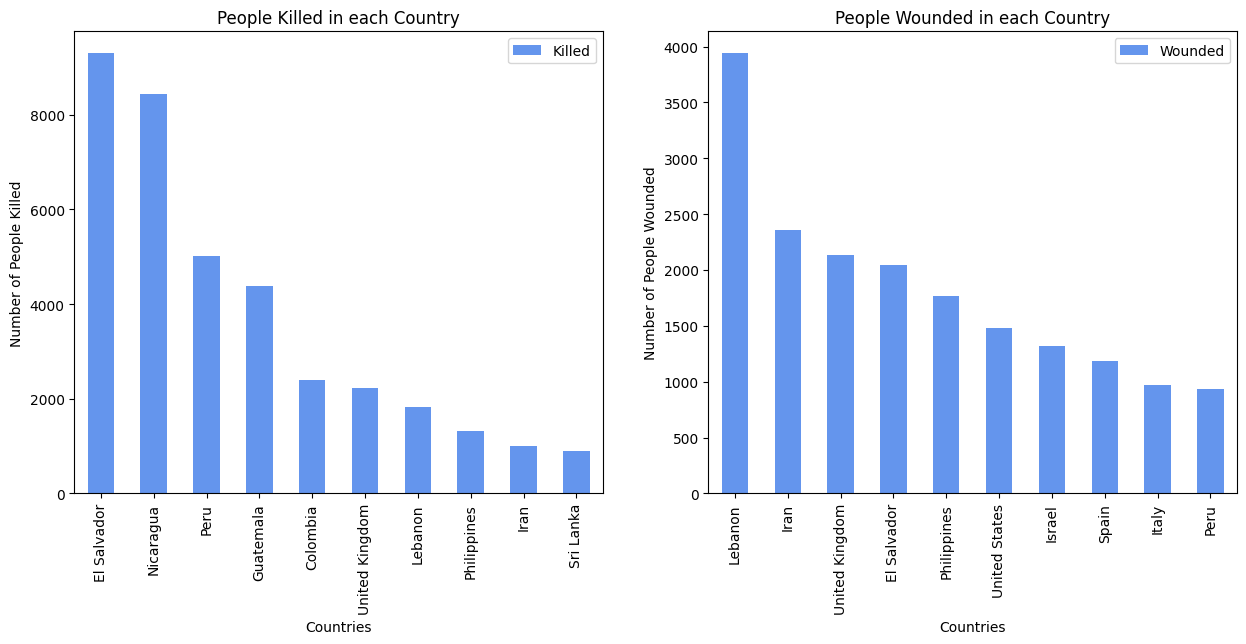

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#4. City wise Attacks - Top 10

1.Number of Attacks in each city

In [ ]:
city=df["City"].value_counts()[1:11]
city

Belfast           1052
San Salvador      1028
Santiago           608
Lima               509
Guatemala City     478
Beirut             474
Rome               474
Paris              426
New York City      389
Bogota             345
Name: City, dtype: int64

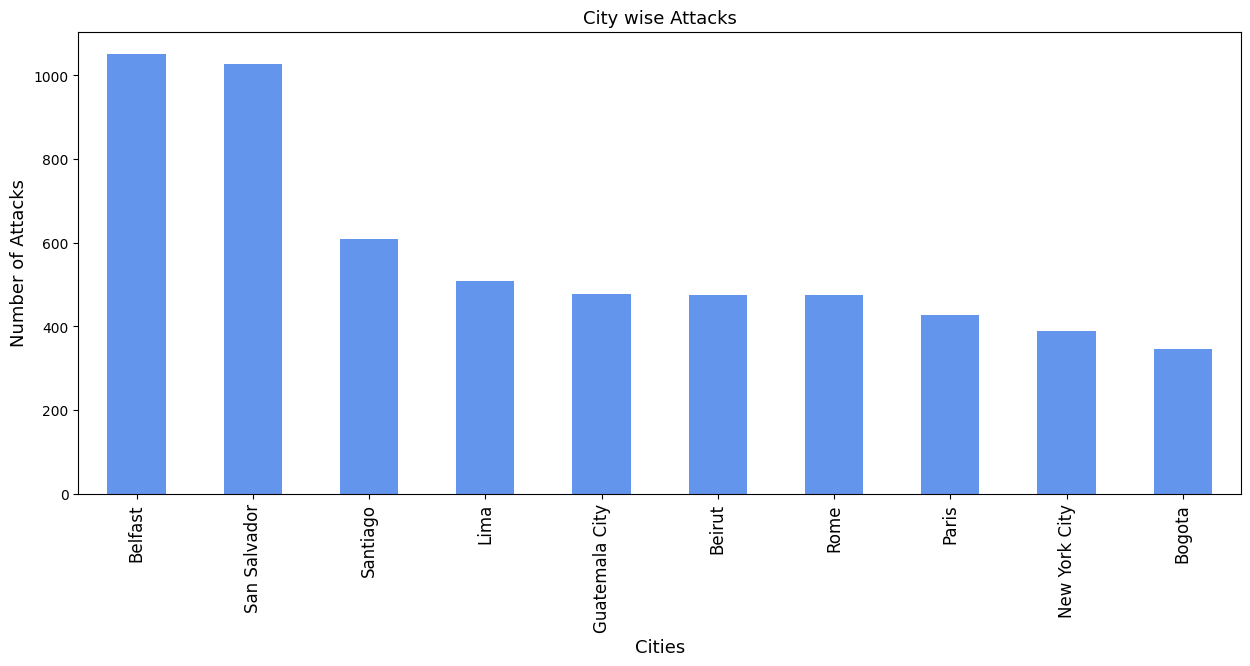

In [ ]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2.Total Casualties (Killed + Wounded) in each City

In [ ]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Beirut,3486.0
Tehran,2072.0
Belfast,1465.0
San Salvador,1059.0
London,818.0
Guatemala City,815.0
The Dalles,778.0
Jerusalem,676.0
Suchitoto,662.0


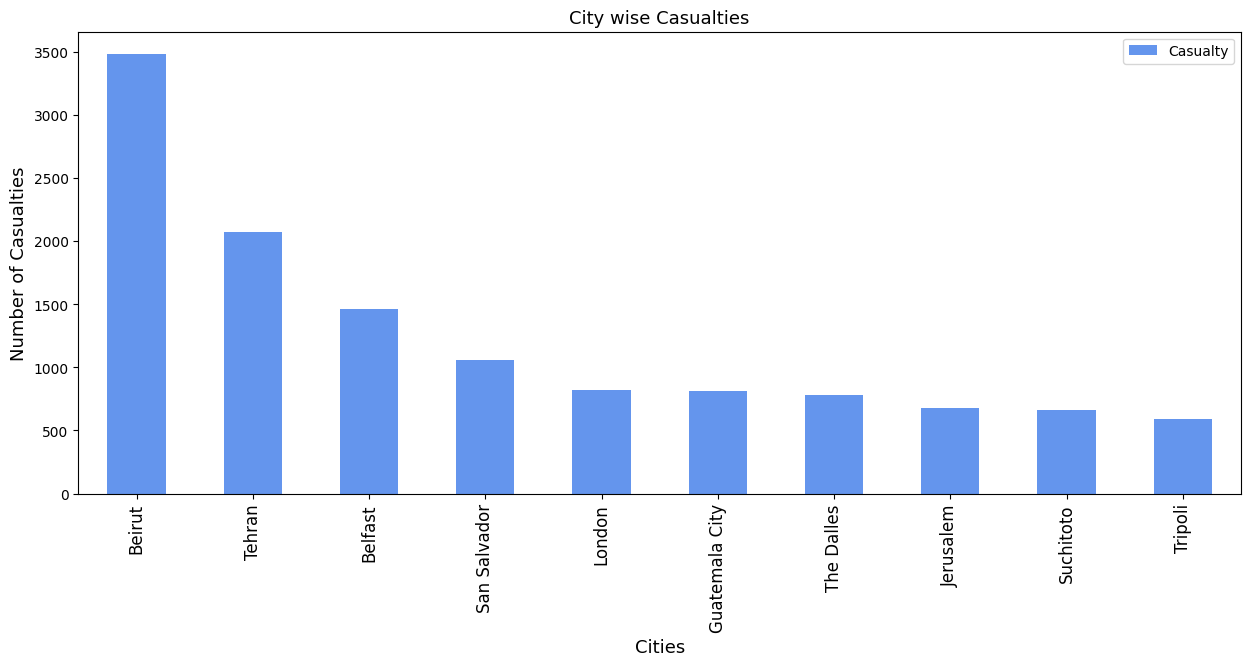

In [ ]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


3.Killed in each City

In [ ]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Beirut,1110.0
Belfast,1027.0
San Salvador,766.0
Suchitoto,562.0
Guatemala City,526.0
Abadan,429.0
Tehran,359.0
Toronto,329.0
Aleppo,326.0


4.Wounded in each City

In [ ]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Beirut,2376.0
Tehran,1713.0
The Dalles,778.0
London,757.0
Jerusalem,627.0
Paris,506.0
Belfast,438.0
Baghdad,433.0
Madrid,365.0


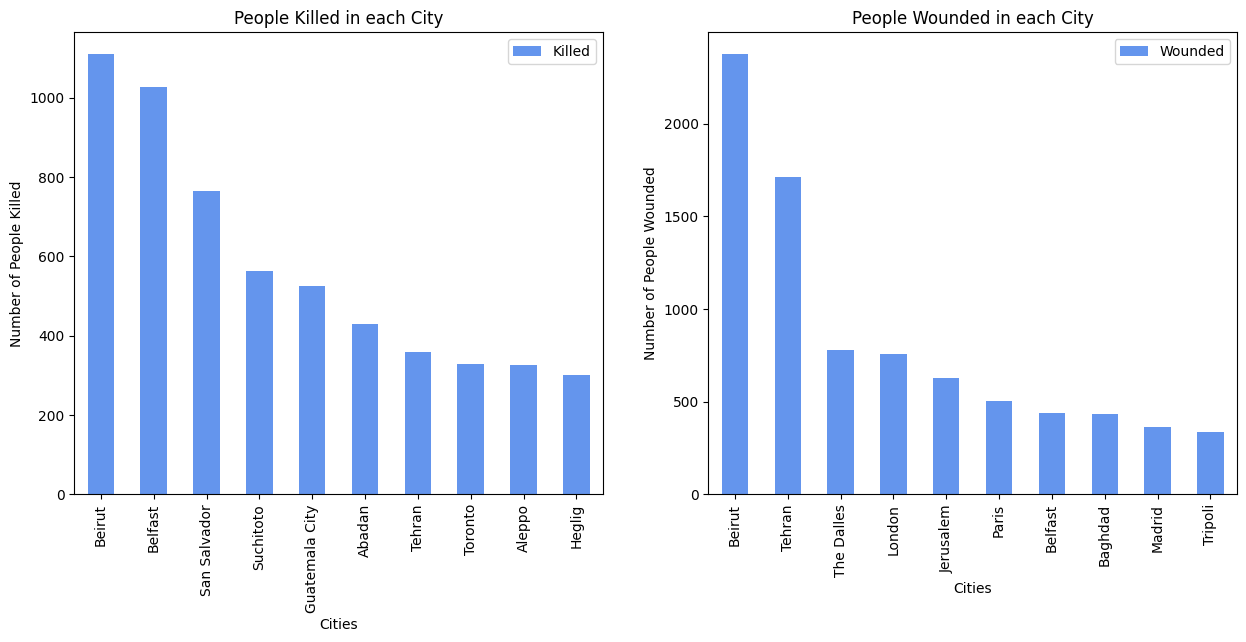

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

#5.Terrorist Group wise Attacks - Top 10

1.Number of Attacks by each Group

In [ ]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)                         1562
Shining Path (SL)                                   1508
Farabundo Marti National Liberation Front (FMLN)    1448
Basque Fatherland and Freedom (ETA)                  988
Nicaraguan Democratic Force (FDN)                    526
Palestinians                                         471
Revolutionary Armed Forces of Colombia (FARC)        425
M-19 (Movement of April 19)                          359
Movement of the Revolutionary Left (MIR) (Chile)     272
Name: Group Name, dtype: int64

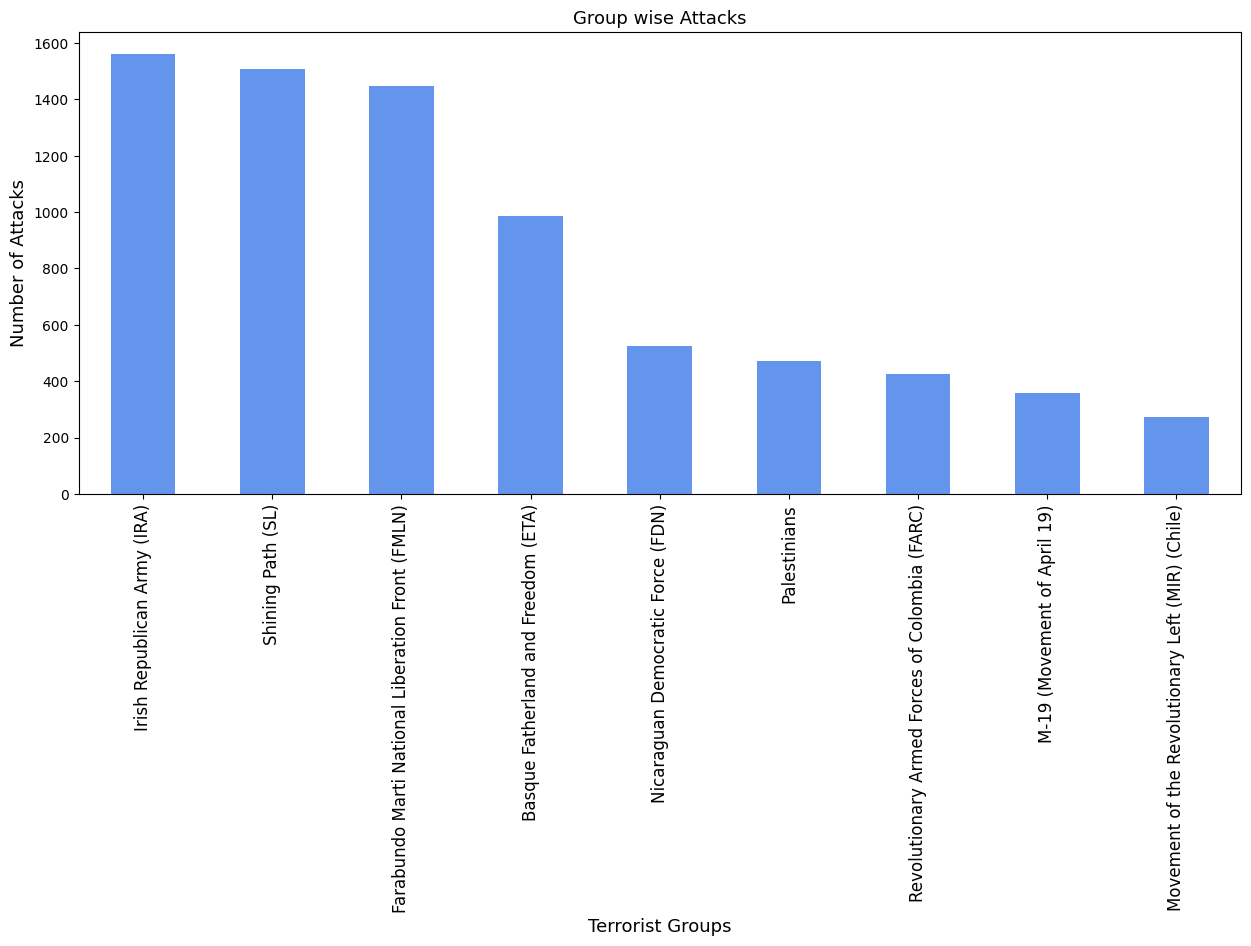

In [ ]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2.Total Casualties(Killed + Wounded) by each Group

In [ ]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Farabundo Marti National Liberation Front (FMLN),6736.0
Nicaraguan Democratic Force (FDN),5826.0
Shining Path (SL),5772.0
Irish Republican Army (IRA),3196.0
Democratic Revolutionary Alliance (ARDE),1877.0
Basque Fatherland and Freedom (ETA),1260.0
Revolutionary Armed Forces of Colombia (FARC),1244.0
Front for the Liberation of Lebanon from Foreigners,1102.0
Moro National Liberation Front (MNLF),979.0


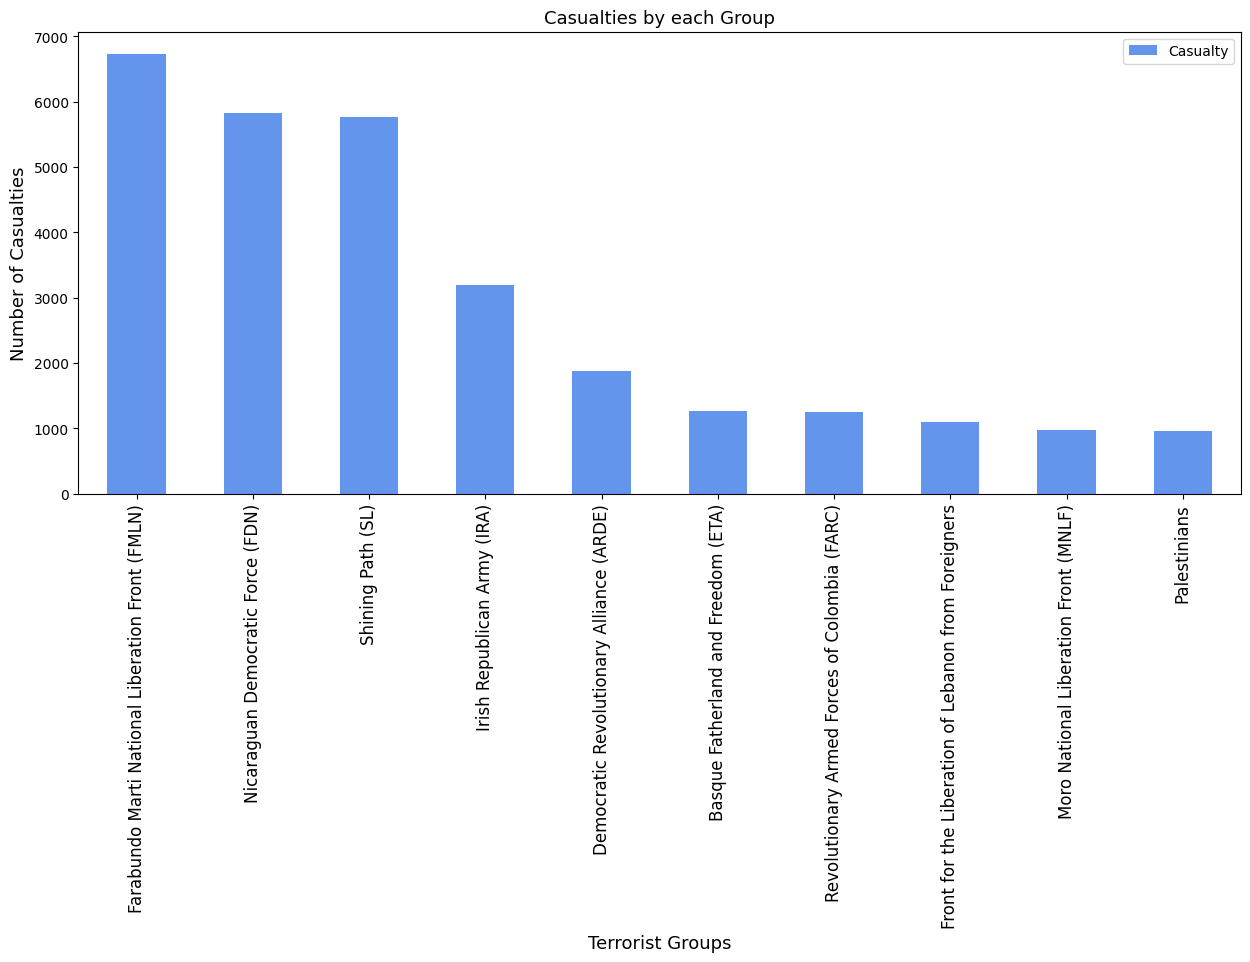

In [ ]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed by each Group

In [ ]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Farabundo Marti National Liberation Front (FMLN),5464.0
Nicaraguan Democratic Force (FDN),5377.0
Shining Path (SL),4887.0
Democratic Revolutionary Alliance (ARDE),1686.0
Irish Republican Army (IRA),1346.0
Revolutionary Armed Forces of Colombia (FARC),1023.0
M-19 (Movement of April 19),645.0
Guerrilla Army of the Poor (EGP),556.0
Tamils,510.0


4.Wounded by each Group

In [ ]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),1850.0
Farabundo Marti National Liberation Front (FMLN),1272.0
Shining Path (SL),885.0
Palestinians,820.0
Front for the Liberation of Lebanon from Foreigners,815.0
Basque Fatherland and Freedom (ETA),805.0
Rajneeshees,778.0
Moro National Liberation Front (MNLF),582.0
African National Congress (South Africa),491.0


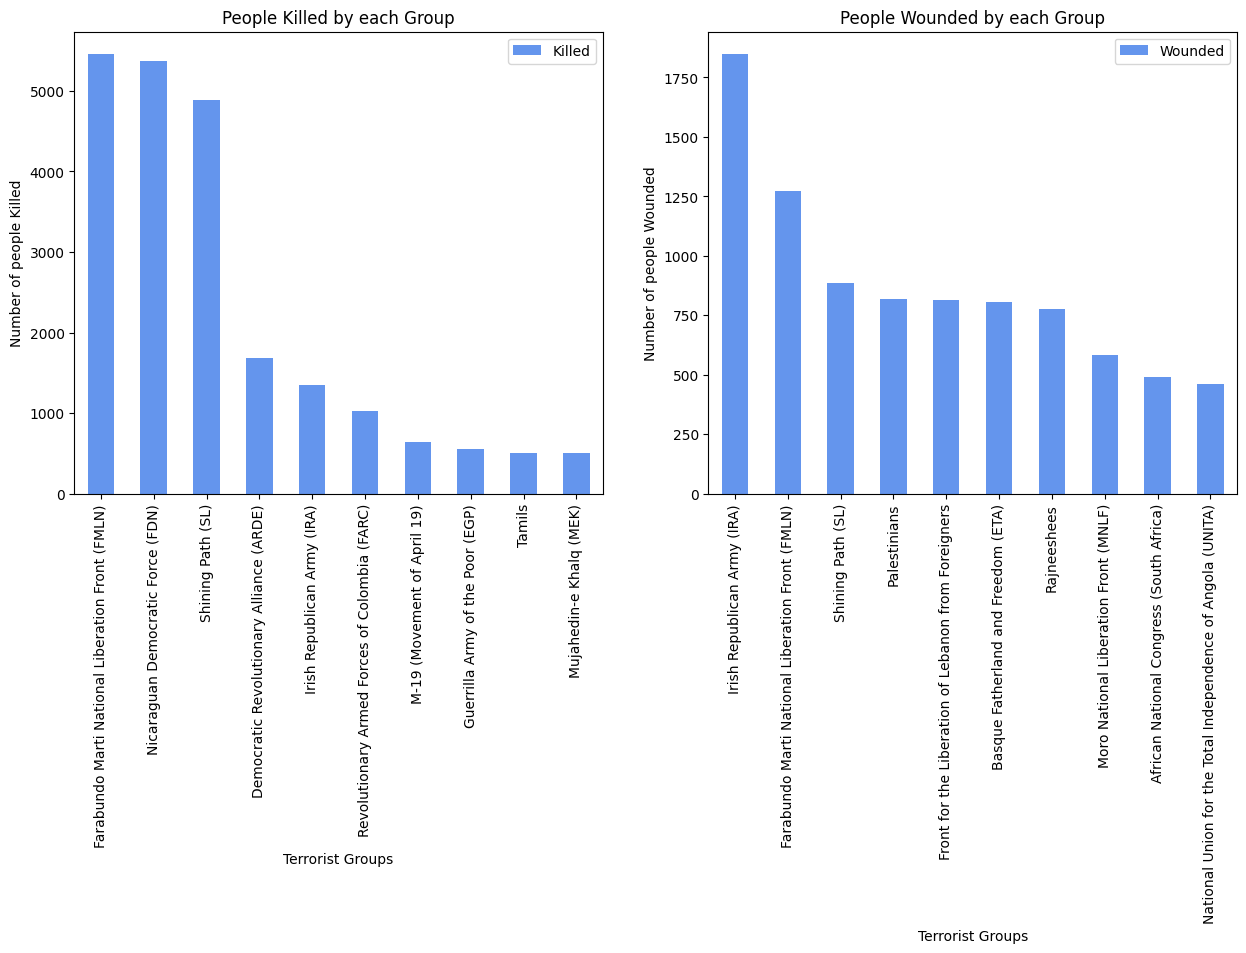

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()


#6.Attack Type wise Attacks

1.Number of Attacks by each Attack Type

In [ ]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      11327
Armed Assault                           5337
Assassination                           4328
Facility/Infrastructure Attack          1958
Hostage Taking (Kidnapping)             1168
Unknown                                  854
Hostage Taking (Barricade Incident)      393
Hijacking                                137
Unarmed Assault                           46
Name: Attack Type, dtype: int64

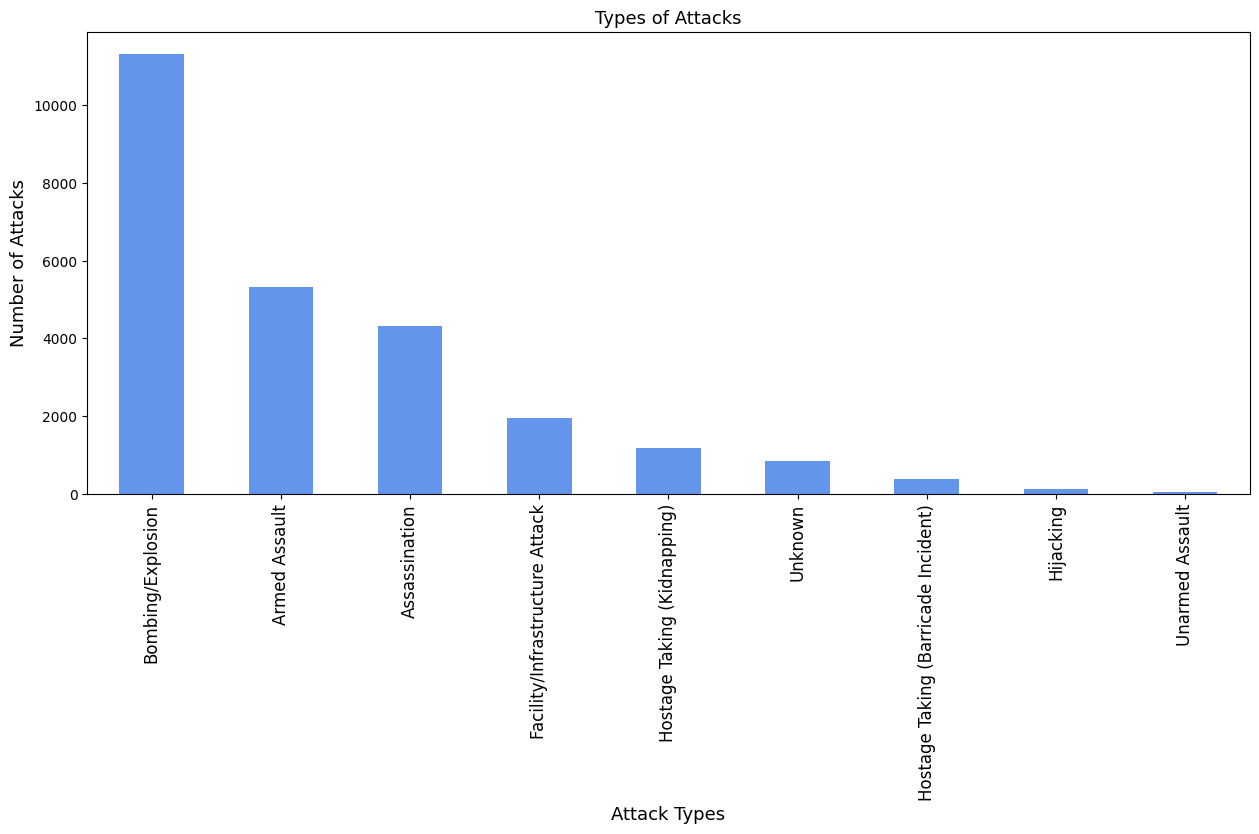

In [ ]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2.Total Casualties (Killed + Wounded) by each Attack Type

In [ ]:
ac=df[["Attack Type","Casualty"]].groupby("Attack Type").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
Attack Type,
Armed Assault,31253.0
Bombing/Explosion,30409.0
Assassination,6365.0
Unknown,3342.0
Facility/Infrastructure Attack,1145.0
Hostage Taking (Barricade Incident),989.0
Unarmed Assault,811.0
Hostage Taking (Kidnapping),553.0
Hijacking,301.0


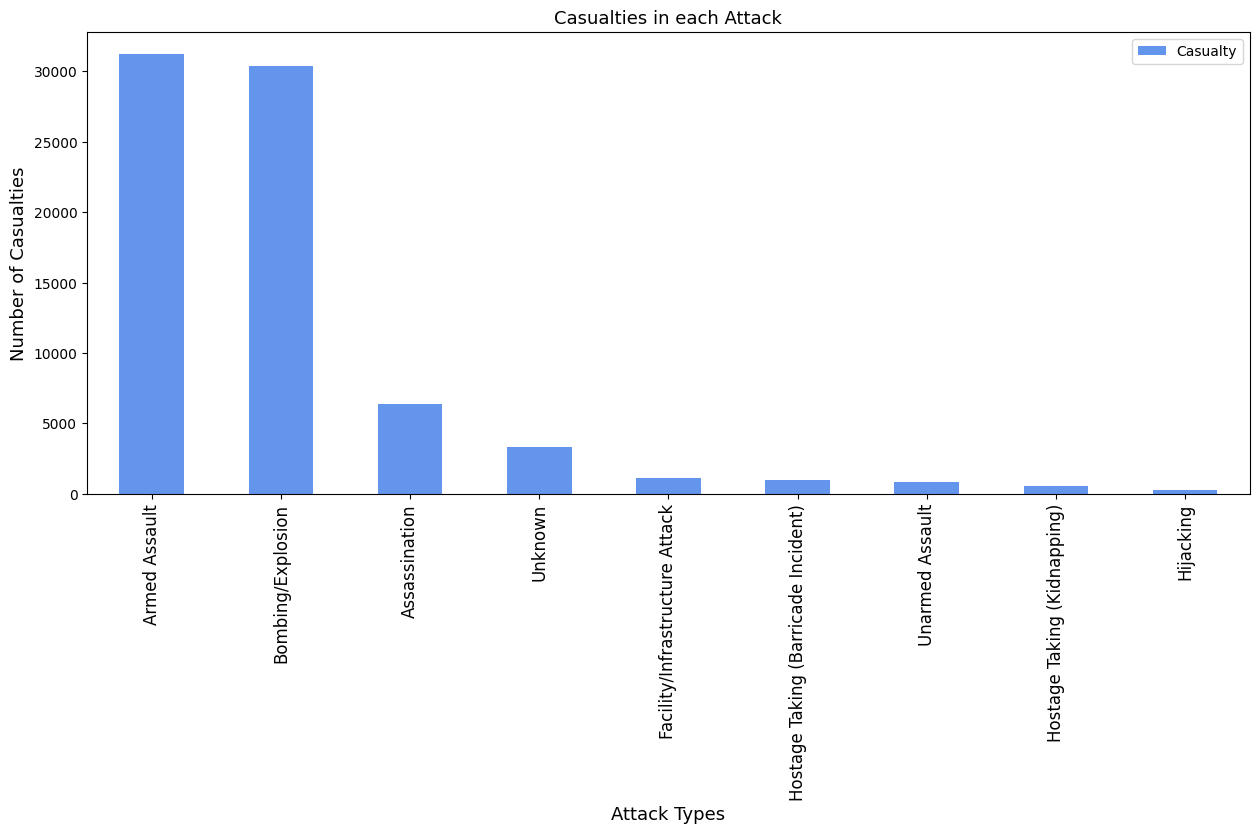

In [ ]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3.Killed by each Attack Type

In [ ]:
ak=df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
Attack Type,
Armed Assault,26145.0
Bombing/Explosion,9278.0
Assassination,5007.0
Unknown,2688.0
Facility/Infrastructure Attack,754.0
Hostage Taking (Kidnapping),481.0
Hostage Taking (Barricade Incident),456.0
Hijacking,215.0
Unarmed Assault,19.0


4.Wounded by each Attack Type

In [ ]:
aw=df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
Attack Type,
Bombing/Explosion,21131.0
Armed Assault,5108.0
Assassination,1358.0
Unarmed Assault,792.0
Unknown,654.0
Hostage Taking (Barricade Incident),533.0
Facility/Infrastructure Attack,391.0
Hijacking,86.0
Hostage Taking (Kidnapping),72.0


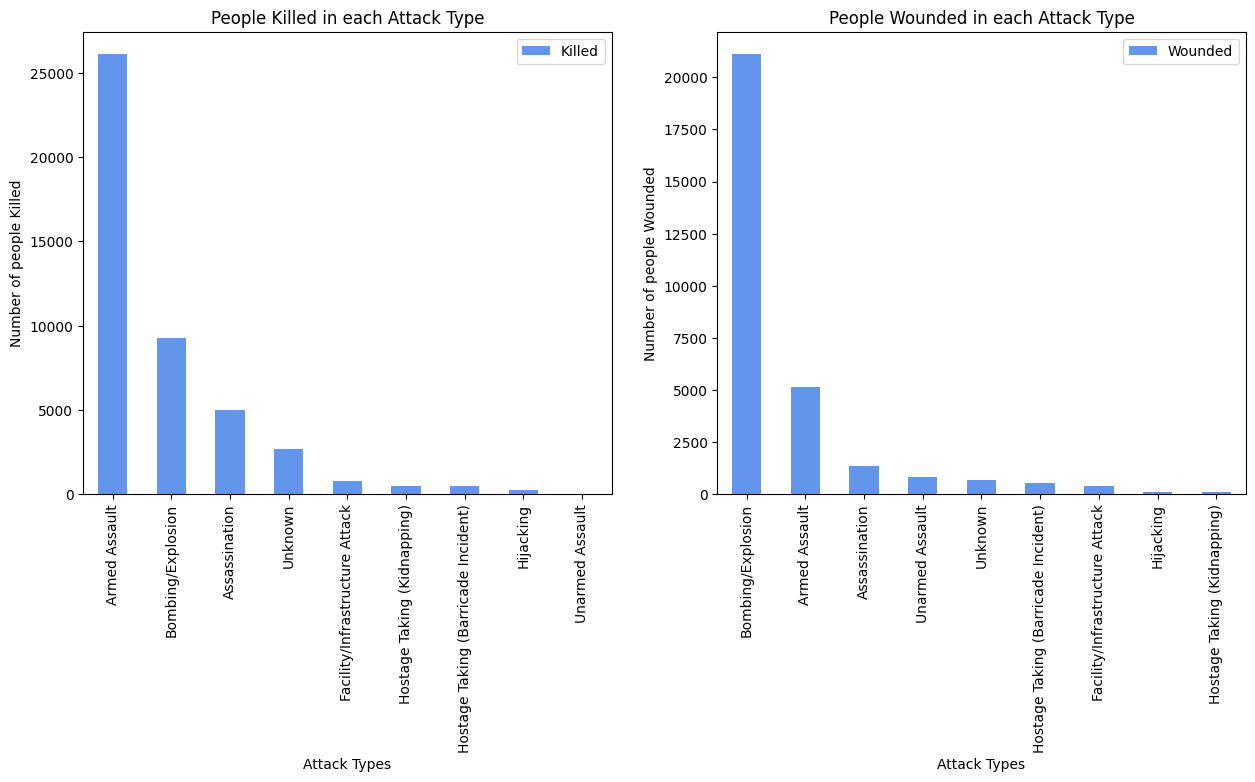

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()


#7.Target Type wise Attacks

1.Number of Attacks over each Target Type

In [ ]:
ta=df["Target Type"].value_counts()
ta

Business                          4944
Private Citizens & Property       4114
Military                          3945
Government (General)              2944
Police                            2517
Utilities                         1323
Government (Diplomatic)           1235
Transportation                    1098
Journalists & Media                675
Educational Institution            609
Airports & Aircraft                576
Religious Figures/Institutions     345
Unknown                            265
Terrorists/Non-State Militia       262
Telecommunication                  224
Violent Political Party            113
Food or Water Supply                77
Maritime                            75
NGO                                 73
Tourists                            71
Abortion Related                    54
Other                                9
Name: Target Type, dtype: int64

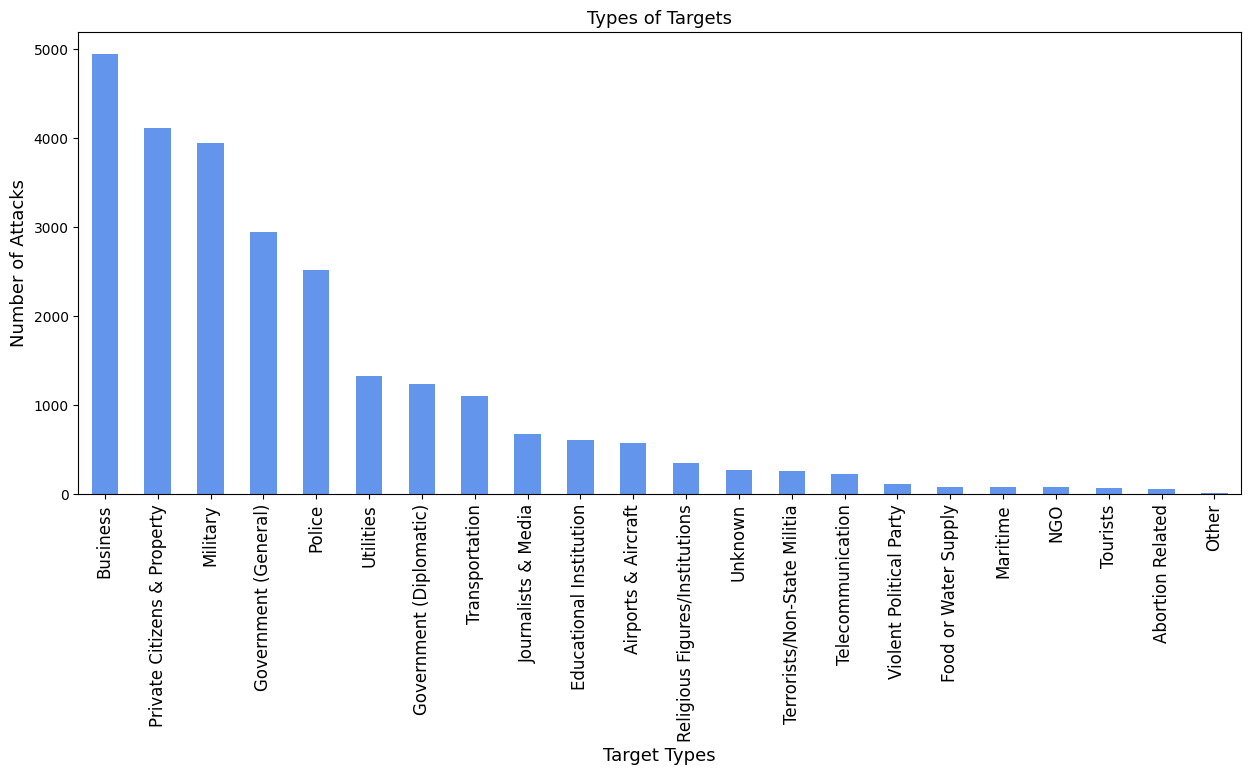

In [ ]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [ ]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
Target Type,
Military,24528.0
Private Citizens & Property,16695.0
Business,8376.0
Police,6227.0
Government (General),4515.0
Transportation,4172.0
Airports & Aircraft,2878.0
Government (Diplomatic),1340.0
Religious Figures/Institutions,1280.0


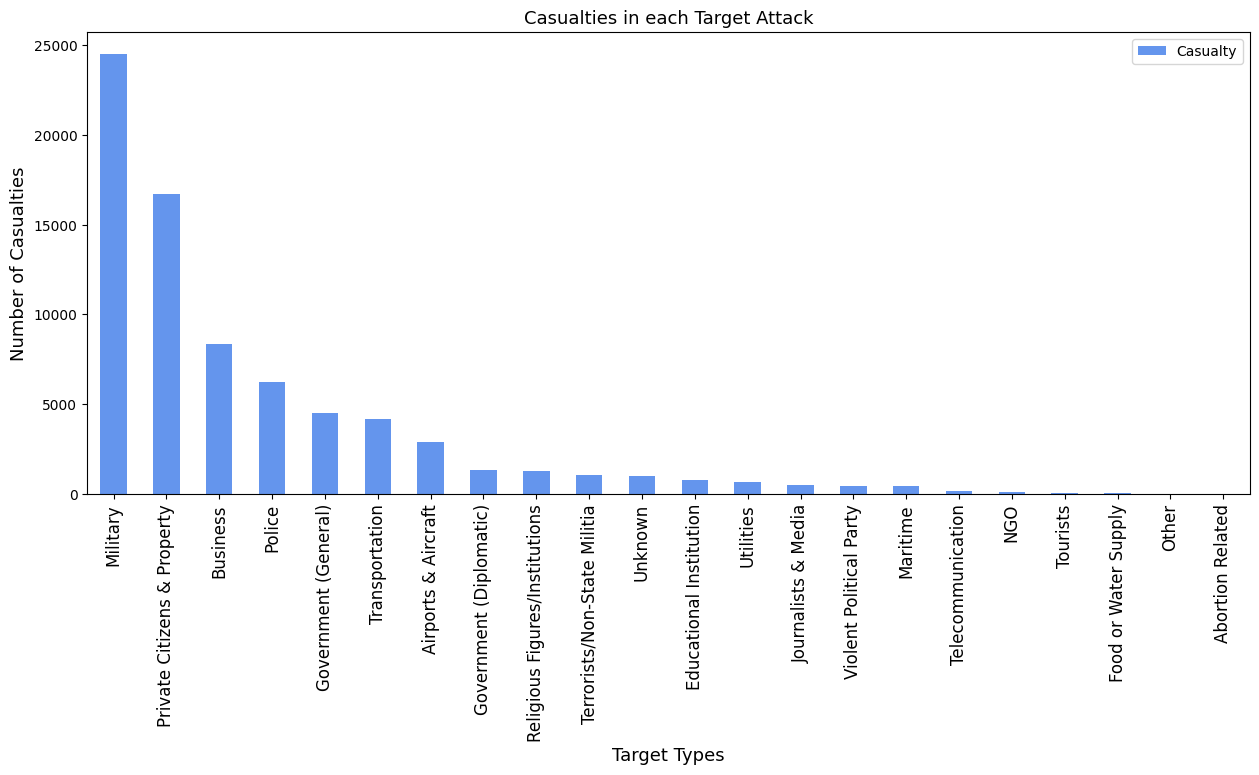

In [ ]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [ ]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk

,Killed
Target Type,
Military,20036.0
Private Citizens & Property,10376.0
Police,3712.0
Business,2669.0
Government (General),1856.0
Transportation,1435.0
Airports & Aircraft,1394.0
Unknown,627.0
Terrorists/Non-State Militia,592.0


In [ ]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw

,Wounded
Target Type,
Private Citizens & Property,6319.0
Business,5707.0
Military,4492.0
Transportation,2737.0
Government (General),2659.0
Police,2515.0
Airports & Aircraft,1484.0
Religious Figures/Institutions,947.0
Government (Diplomatic),918.0


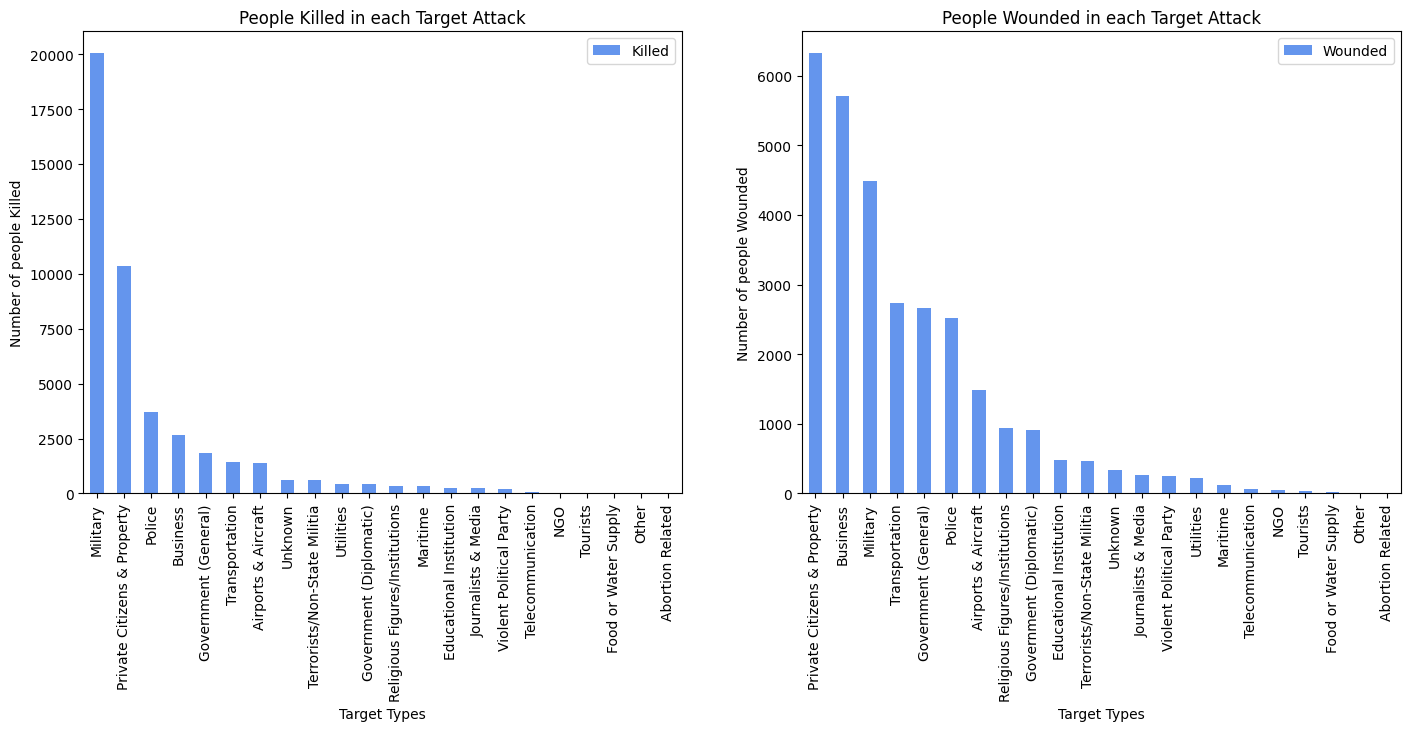

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()


#8.Group + Country wise - Top10

1.Sorting by number of Attacks

In [ ]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

<ipython-input-132-e3f050b9d645>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Irish Republican Army (IRA)                       United Kingdom    1501
Shining Path (SL)                                 Peru              1499
Farabundo Marti National Liberation Front (FMLN)  El Salvador       1437
Basque Fatherland and Freedom (ETA)               Spain              974
Nicaraguan Democratic Force (FDN)                 Nicaragua          522
Revolutionary Armed Forces of Colombia (FARC)     Colombia           423
M-19 (Movement of April 19)                       Colombia           355
Movement of the Revolutionary Left (MIR) (Chile)  Chile              272
Corsican National Liberation Front (FLNC)         France             265
Palestinians                                      Israel             235
dtype: int64

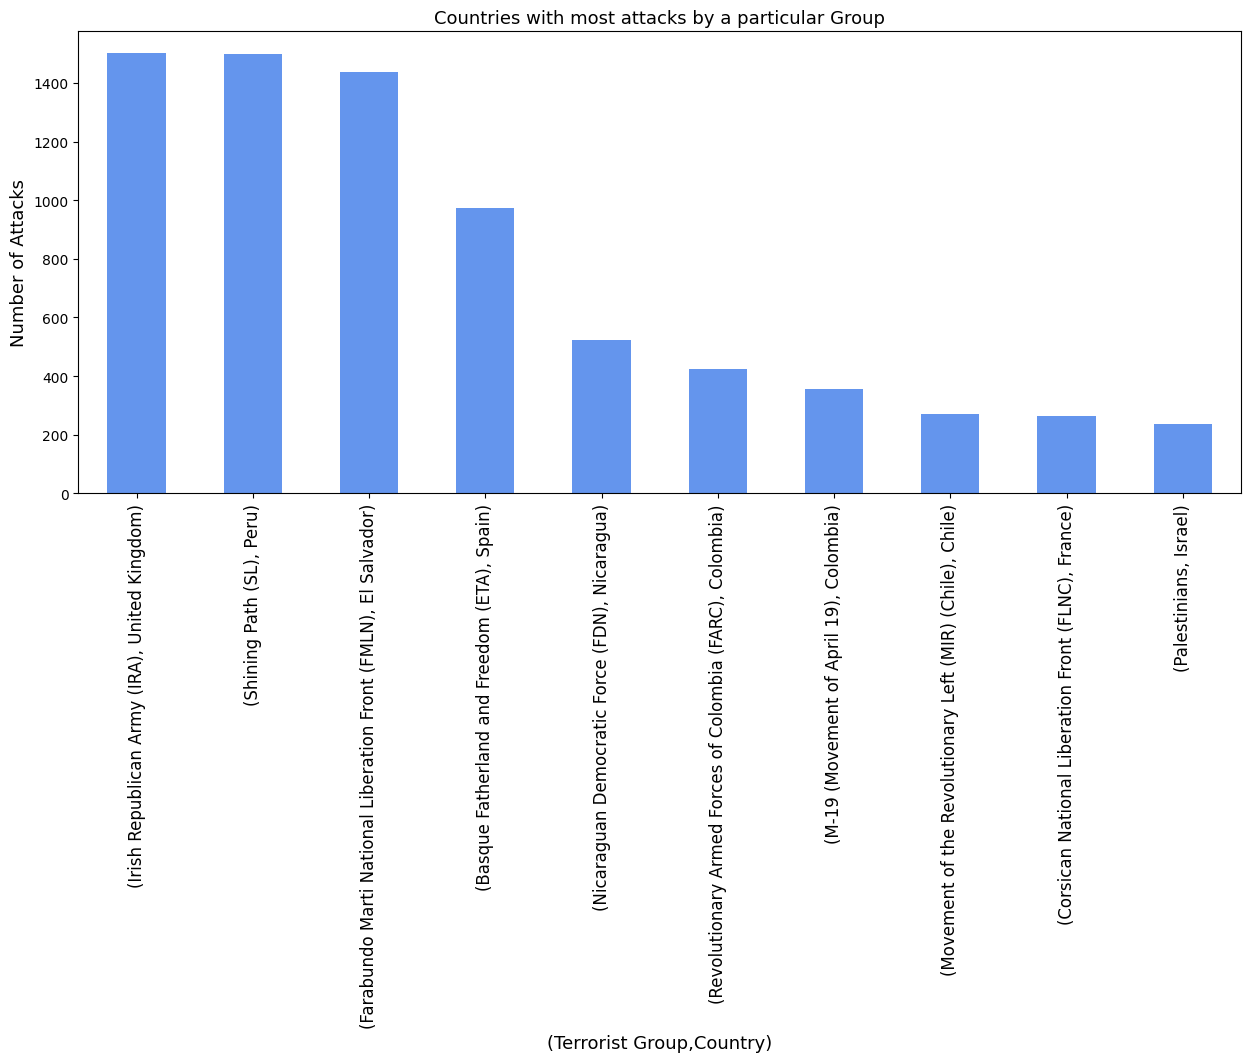

In [ ]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


2.Sorting by Number of Casualties

In [ ]:
gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

<ipython-input-134-eaf64a6f7a91>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["Group Name","Country","Casualty"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
Group Name,Country,
Farabundo Marti National Liberation Front (FMLN),El Salvador,6721.0
Nicaraguan Democratic Force (FDN),Nicaragua,5801.0
Shining Path (SL),Peru,5772.0
Irish Republican Army (IRA),United Kingdom,3119.0
Democratic Revolutionary Alliance (ARDE),Nicaragua,1877.0
Basque Fatherland and Freedom (ETA),Spain,1251.0
Revolutionary Armed Forces of Colombia (FARC),Colombia,1244.0
Moro National Liberation Front (MNLF),Philippines,979.0
M-19 (Movement of April 19),Colombia,928.0


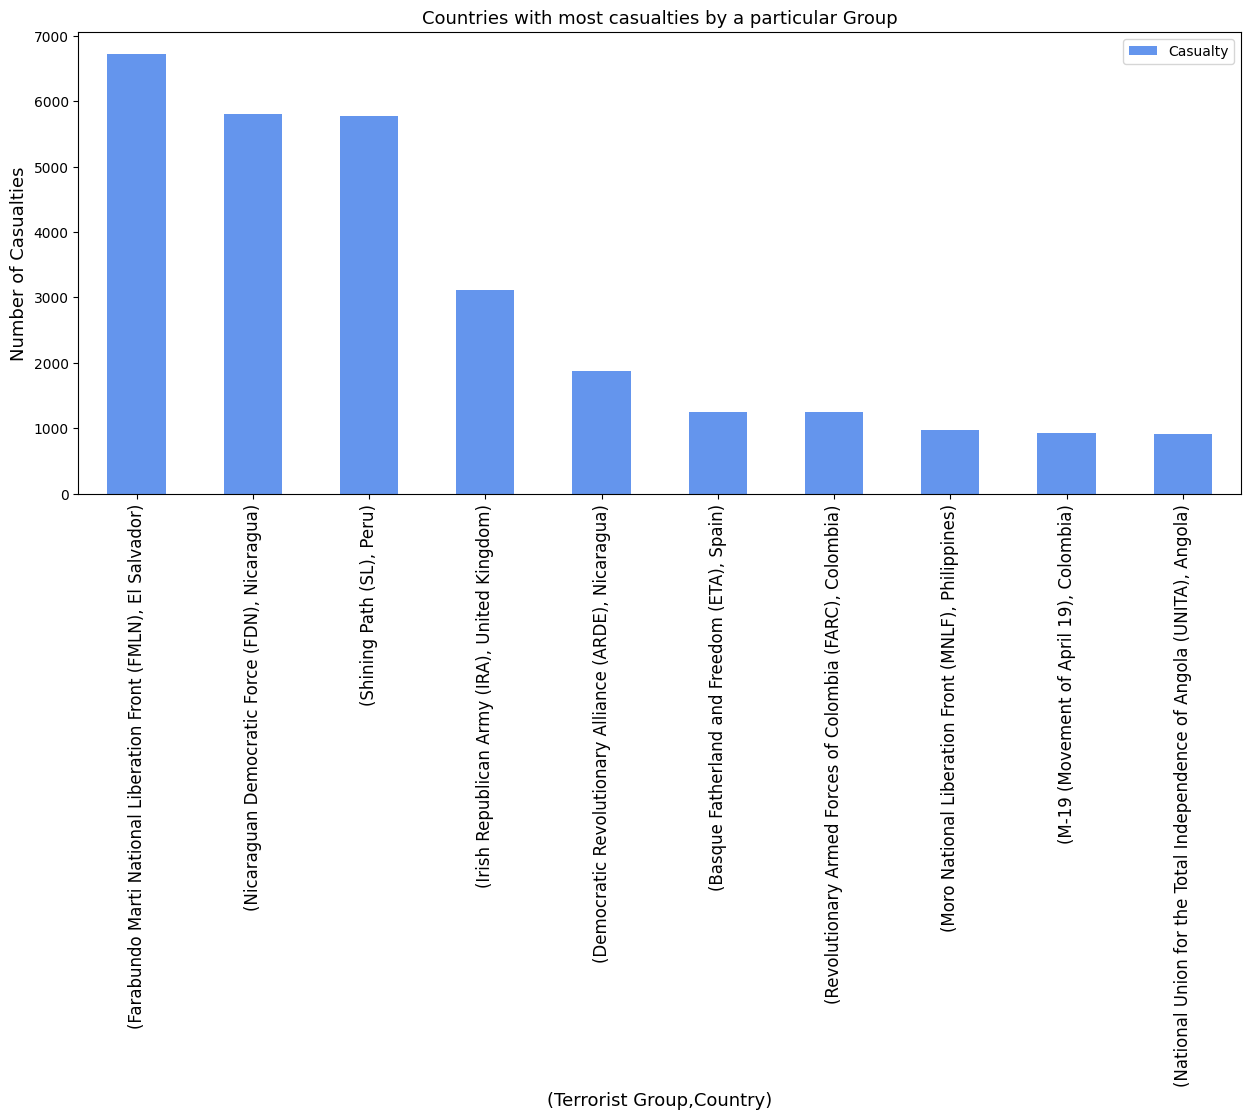

In [ ]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()


3.Sorting by Number of People Killed

In [ ]:
gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
gck

<ipython-input-136-e36c2164dccc>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Farabundo Marti National Liberation Front (FMLN),El Salvador,5456.0
Nicaraguan Democratic Force (FDN),Nicaragua,5356.0
Shining Path (SL),Peru,4887.0
Democratic Revolutionary Alliance (ARDE),Nicaragua,1686.0
Irish Republican Army (IRA),United Kingdom,1303.0
Revolutionary Armed Forces of Colombia (FARC),Colombia,1023.0
M-19 (Movement of April 19),Colombia,641.0
Guerrilla Army of the Poor (EGP),Guatemala,549.0
Tamils,Sri Lanka,510.0


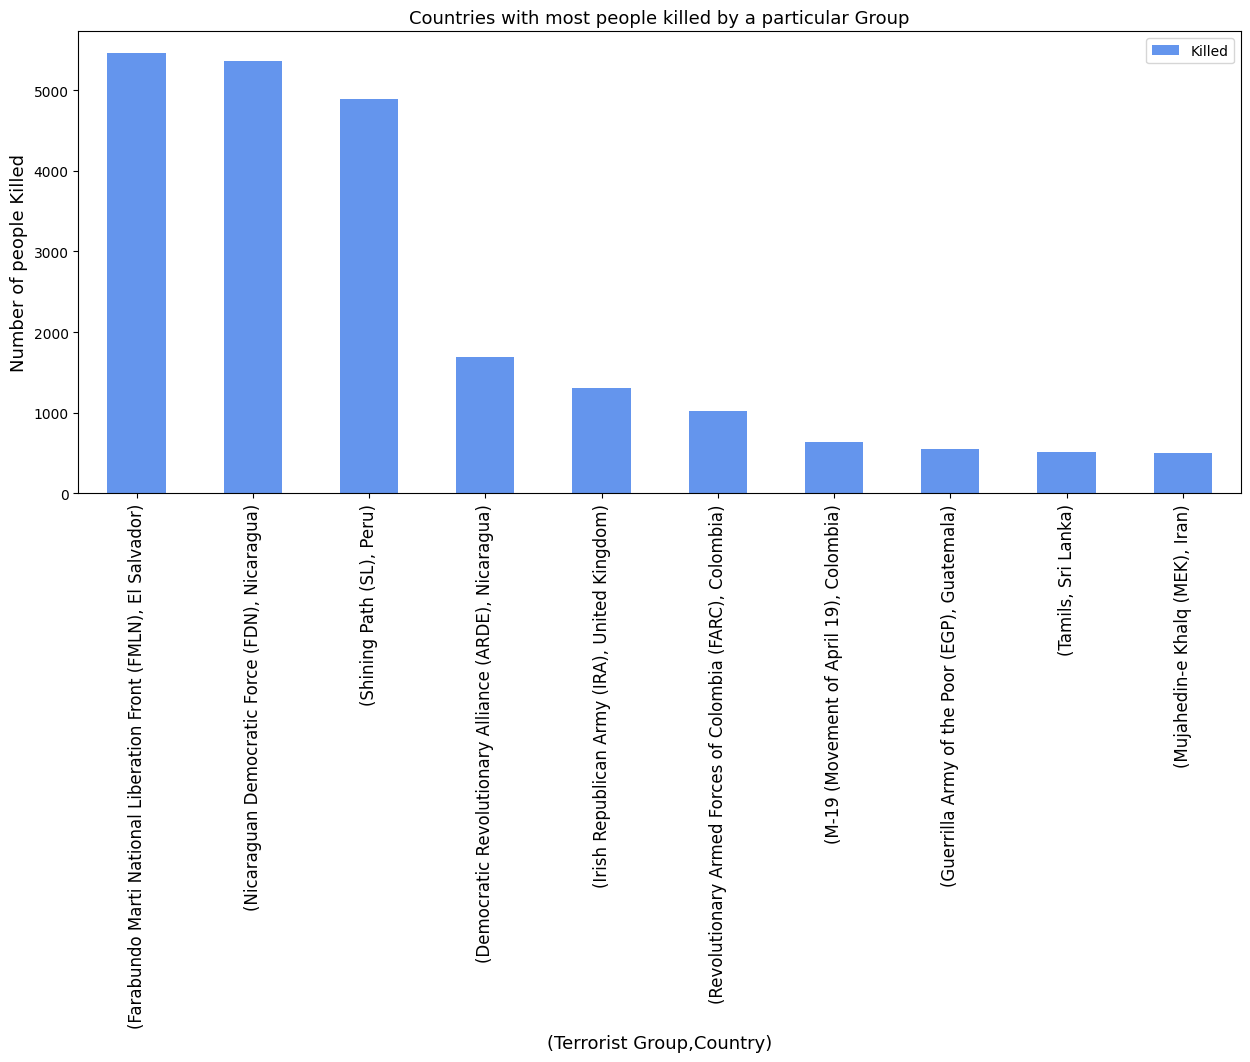

In [ ]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

4.Sorting by Number of People Wounded

In [ ]:
gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
gcw

<ipython-input-138-c01c65ff58a6>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


,,Wounded
Group Name,Country,
Irish Republican Army (IRA),United Kingdom,1816.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,1265.0
Shining Path (SL),Peru,885.0
Basque Fatherland and Freedom (ETA),Spain,799.0
Rajneeshees,United States,778.0
Front for the Liberation of Lebanon from Foreigners,Lebanon,672.0
Moro National Liberation Front (MNLF),Philippines,582.0
African National Congress (South Africa),South Africa,488.0
Palestinians,Israel,474.0


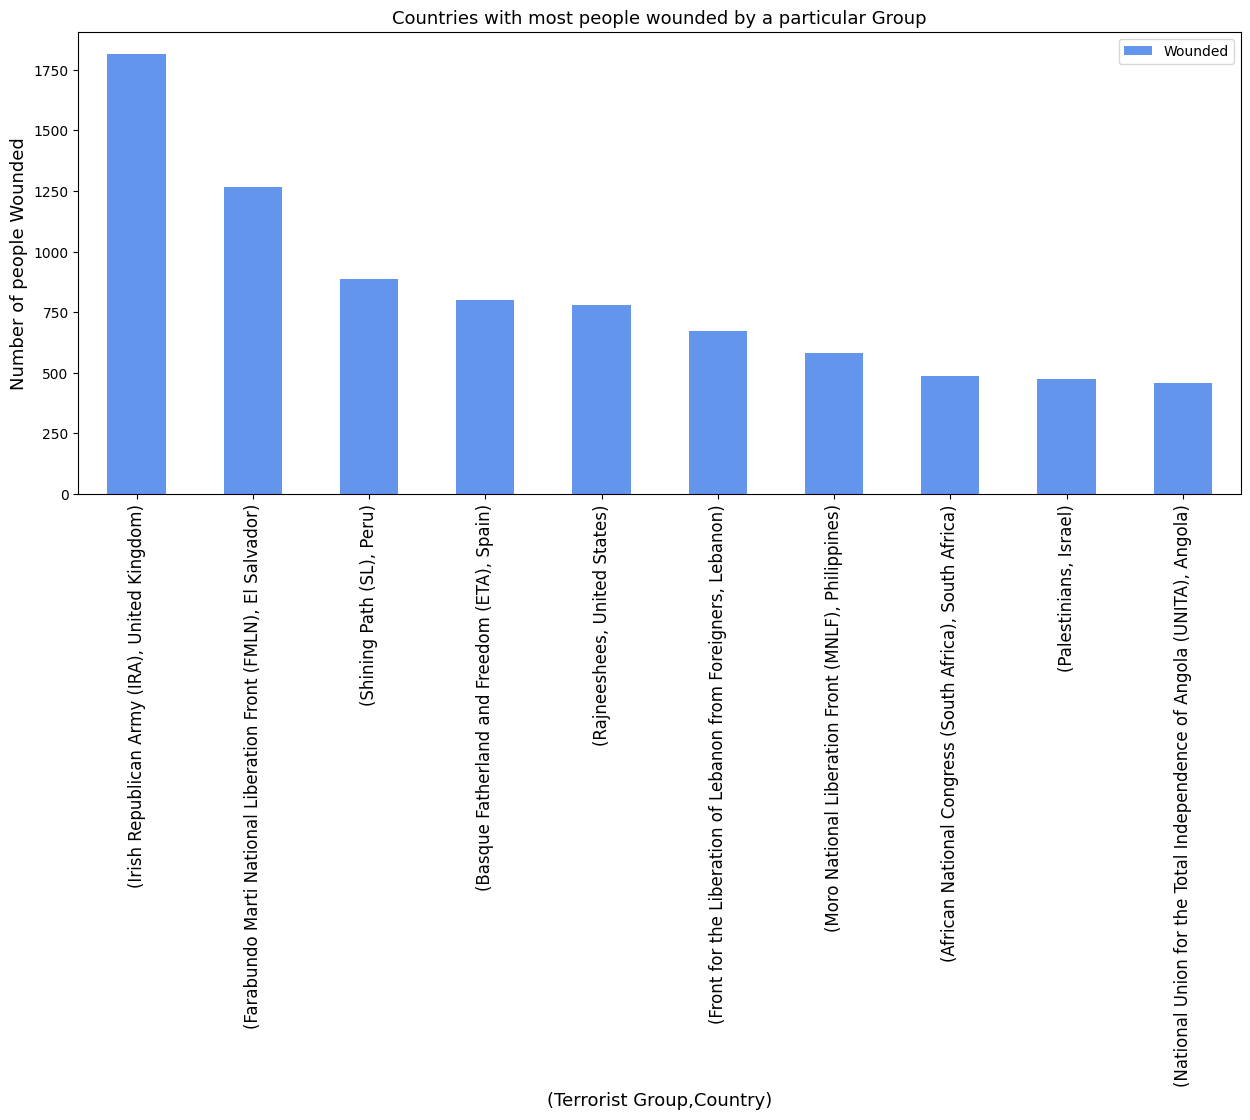

In [ ]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

#9.Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017

1.Total Casualties (Killed + Wounded) due to Terrorist Attacks

In [ ]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 75168.0


2.Killed due to Terrorist Attacks

In [ ]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 45043.0


3.Wounded due to Terrorist Attacks

In [ ]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 30125.0
